In [1]:
#combined positive and negative reviews into one field for sentiment analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
url= "https://ralston-hotel-data-bucket.s3.amazonaws.com/Hotel_Reviews_Clean.csv"

In [4]:
hotel_df = pd.read_csv(url)

In [5]:
hotel_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Negative
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Positive
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,Positive
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,Negative
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,Positive


In [6]:
#create random sample of original dataset - 5% sample
hotel_sample_df = hotel_df.sample(frac=.05)

In [7]:
hotel_sample_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,Location,2,4,7.1,"[' Leisure trip ', ' Family with older childre...",618 day,45.475884,9.205791,Italy,Positive
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,Great location convenient for almost everythi...,34,8,8.3,"[' Leisure trip ', ' Solo traveler ', ' Small ...",263 day,45.473980,9.196067,Italy,Positive
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,Ideal location for guests travelling by rail ...,14,1,9.6,"[' Solo traveler ', ' Deluxe Room Barlow Wing ...",623 day,51.526777,-0.132491,UK,Positive
186869,187251,419 437 Hackney Road London E2 8PP UK,688,2017-08-02,7.8,The RE London Shoreditch,United Kingdom,It was tricky getting the television to work,9,2147,Hotel was very accomodating regarding bike st...,9,1,9.2,"[' Leisure trip ', ' Group ', ' Twin Room ', '...",1 days,51.531979,-0.061598,UK,Positive
158580,158672,35 Charles Street Mayfair Westminster Borough ...,252,2017-06-30,9.1,The Chesterfield Mayfair,United Kingdom,Nothing,2,1166,Had a great time the bar staff Piano player n...,13,3,10.0,"[' Business trip ', ' Couple ', ' Classic Doub...",34 days,51.507690,-0.147136,UK,Positive


In [8]:
from ast import literal_eval

In [9]:
def impute(column):
    column = column[0]
    if (type(column) != list):
        return "".join(literal_eval(column))
    else:
        return column
    
hotel_sample_df["Tags"] = hotel_sample_df[["Tags"]].apply(impute, axis=1)
hotel_sample_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,Location,2,4,7.1,Leisure trip Family with older children Sup...,618 day,45.475884,9.205791,Italy,Positive
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,Great location convenient for almost everythi...,34,8,8.3,Leisure trip Solo traveler Small Single Roo...,263 day,45.473980,9.196067,Italy,Positive
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,Ideal location for guests travelling by rail ...,14,1,9.6,Solo traveler Deluxe Room Barlow Wing Staye...,623 day,51.526777,-0.132491,UK,Positive
186869,187251,419 437 Hackney Road London E2 8PP UK,688,2017-08-02,7.8,The RE London Shoreditch,United Kingdom,It was tricky getting the television to work,9,2147,Hotel was very accomodating regarding bike st...,9,1,9.2,Leisure trip Group Twin Room Stayed 1 nigh...,1 days,51.531979,-0.061598,UK,Positive
158580,158672,35 Charles Street Mayfair Westminster Borough ...,252,2017-06-30,9.1,The Chesterfield Mayfair,United Kingdom,Nothing,2,1166,Had a great time the bar staff Piano player n...,13,3,10.0,Business trip Couple Classic Double Room S...,34 days,51.507690,-0.147136,UK,Positive


In [10]:
hotel_sample_df['Hotel_Country'] = hotel_sample_df['Hotel_Country'].str.lower()
hotel_sample_df['Tags'] = hotel_sample_df['Tags'].str.lower()

In [11]:
# picking up 8/16/22

In [12]:
# combine reviews into one field
hotel_sample_df["All_Reviews"] = hotel_sample_df['Positive_Review'].astype(str) +"-"+ hotel_sample_df["Negative_Review"]
hotel_sample_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment,All_Reviews
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,...,2,4,7.1,leisure trip family with older children sup...,618 day,45.475884,9.205791,italy,Positive,Location- level of noise from the metro and o...
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,...,34,8,8.3,leisure trip solo traveler small single roo...,263 day,45.473980,9.196067,italy,Positive,Great location convenient for almost everythi...
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,...,14,1,9.6,solo traveler deluxe room barlow wing staye...,623 day,51.526777,-0.132491,uk,Positive,Ideal location for guests travelling by rail ...
186869,187251,419 437 Hackney Road London E2 8PP UK,688,2017-08-02,7.8,The RE London Shoreditch,United Kingdom,It was tricky getting the television to work,9,2147,...,9,1,9.2,leisure trip group twin room stayed 1 nigh...,1 days,51.531979,-0.061598,uk,Positive,Hotel was very accomodating regarding bike st...
158580,158672,35 Charles Street Mayfair Westminster Borough ...,252,2017-06-30,9.1,The Chesterfield Mayfair,United Kingdom,Nothing,2,1166,...,13,3,10.0,business trip couple classic double room s...,34 days,51.507690,-0.147136,uk,Positive,Had a great time the bar staff Piano player n...


In [13]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

hotel_sample_df['All_Reviews_token']=hotel_sample_df['All_Reviews'].apply(regexp.tokenize)
hotel_sample_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment,All_Reviews,All_Reviews_token
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,...,4,7.1,leisure trip family with older children sup...,618 day,45.475884,9.205791,italy,Positive,Location- level of noise from the metro and o...,"[Location, level, of, noise, from, the, metro,..."
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,...,8,8.3,leisure trip solo traveler small single roo...,263 day,45.473980,9.196067,italy,Positive,Great location convenient for almost everythi...,"[Great, location, convenient, for, almost, eve..."
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,...,1,9.6,solo traveler deluxe room barlow wing staye...,623 day,51.526777,-0.132491,uk,Positive,Ideal location for guests travelling by rail ...,"[Ideal, location, for, guests, travelling, by,..."
186869,187251,419 437 Hackney Road London E2 8PP UK,688,2017-08-02,7.8,The RE London Shoreditch,United Kingdom,It was tricky getting the television to work,9,2147,...,1,9.2,leisure trip group twin room stayed 1 nigh...,1 days,51.531979,-0.061598,uk,Positive,Hotel was very accomodating regarding bike st...,"[Hotel, was, very, accomodating, regarding, bi..."
158580,158672,35 Charles Street Mayfair Westminster Borough ...,252,2017-06-30,9.1,The Chesterfield Mayfair,United Kingdom,Nothing,2,1166,...,3,10.0,business trip couple classic double room s...,34 days,51.507690,-0.147136,uk,Positive,Had a great time the bar staff Piano player n...,"[Had, a, great, time, the, bar, staff, Piano, ..."


In [14]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neil.ralston.MAC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [16]:
hotel_sample_df['All_Reviews_token'] = hotel_sample_df['All_Reviews_token'].apply(lambda x: [item for item in x if item not in stopwords])
hotel_sample_df.head(3)

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment,All_Reviews,All_Reviews_token
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,...,4,7.1,leisure trip family with older children sup...,618 day,45.475884,9.205791,italy,Positive,Location- level of noise from the metro and o...,"[Location, level, noise, metro, guests, We, go..."
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,...,8,8.3,leisure trip solo traveler small single roo...,263 day,45.473980,9.196067,italy,Positive,Great location convenient for almost everythi...,"[Great, location, convenient, almost, everythi..."
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,...,1,9.6,solo traveler deluxe room barlow wing staye...,623 day,51.526777,-0.132491,uk,Positive,Ideal location for guests travelling by rail ...,"[Ideal, location, guests, travelling, rail, Ve..."


In [17]:
hotel_sample_df['All_Reviews_string'] = hotel_sample_df['All_Reviews_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
hotel_sample_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment,All_Reviews,All_Reviews_token,All_Reviews_string
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,...,7.1,leisure trip family with older children sup...,618 day,45.475884,9.205791,italy,Positive,Location- level of noise from the metro and o...,"[Location, level, noise, metro, guests, We, go...",Location level noise metro guests got little s...
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,...,8.3,leisure trip solo traveler small single roo...,263 day,45.473980,9.196067,italy,Positive,Great location convenient for almost everythi...,"[Great, location, convenient, almost, everythi...",Great location convenient almost everything Go...
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,...,9.6,solo traveler deluxe room barlow wing staye...,623 day,51.526777,-0.132491,uk,Positive,Ideal location for guests travelling by rail ...,"[Ideal, location, guests, travelling, rail, Ve...",Ideal location guests travelling rail Very com...
186869,187251,419 437 Hackney Road London E2 8PP UK,688,2017-08-02,7.8,The RE London Shoreditch,United Kingdom,It was tricky getting the television to work,9,2147,...,9.2,leisure trip group twin room stayed 1 nigh...,1 days,51.531979,-0.061598,uk,Positive,Hotel was very accomodating regarding bike st...,"[Hotel, accomodating, regarding, bike, storage...",Hotel accomodating regarding bike storage tric...
158580,158672,35 Charles Street Mayfair Westminster Borough ...,252,2017-06-30,9.1,The Chesterfield Mayfair,United Kingdom,Nothing,2,1166,...,10.0,business trip couple classic double room s...,34 days,51.507690,-0.147136,uk,Positive,Had a great time the bar staff Piano player n...,"[Had, great, time, bar, staff, Piano, player, ...",Had great time bar staff Piano player nailed N...


In [18]:
all_words = ' '.join([word for word in hotel_sample_df['All_Reviews_string']])

In [19]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [20]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'room': 13771, 'The': 13580, 'staff': 9338, 'hotel': 9010, 'location': 7236, 'Negative': 6263, 'breakfast': 5186, 'good': 5126, 'friendly': 3940, 'helpful': 3895, ...})

In [21]:
hotel_sample_df['All_Reviews_string_fdist'] = hotel_sample_df['All_Reviews_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 4 ]))

In [22]:
hotel_sample_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Tags,days_since_review,lat,lng,Hotel_Country,Sentiment,All_Reviews,All_Reviews_token,All_Reviews_string,All_Reviews_string_fdist
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,...,leisure trip family with older children sup...,618 day,45.475884,9.205791,italy,Positive,Location- level of noise from the metro and o...,"[Location, level, noise, metro, guests, We, go...",Location level noise metro guests got little s...,Location level noise metro guests got little s...
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,...,leisure trip solo traveler small single roo...,263 day,45.473980,9.196067,italy,Positive,Great location convenient for almost everythi...,"[Great, location, convenient, almost, everythi...",Great location convenient almost everything Go...,Great location convenient almost everything Go...
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,...,solo traveler deluxe room barlow wing staye...,623 day,51.526777,-0.132491,uk,Positive,Ideal location for guests travelling by rail ...,"[Ideal, location, guests, travelling, rail, Ve...",Ideal location guests travelling rail Very com...,Ideal location guests travelling rail Very com...
186869,187251,419 437 Hackney Road London E2 8PP UK,688,2017-08-02,7.8,The RE London Shoreditch,United Kingdom,It was tricky getting the television to work,9,2147,...,leisure trip group twin room stayed 1 nigh...,1 days,51.531979,-0.061598,uk,Positive,Hotel was very accomodating regarding bike st...,"[Hotel, accomodating, regarding, bike, storage...",Hotel accomodating regarding bike storage tric...,Hotel accomodating regarding bike storage tric...
158580,158672,35 Charles Street Mayfair Westminster Borough ...,252,2017-06-30,9.1,The Chesterfield Mayfair,United Kingdom,Nothing,2,1166,...,business trip couple classic double room s...,34 days,51.507690,-0.147136,uk,Positive,Had a great time the bar staff Piano player n...,"[Had, great, time, bar, staff, Piano, player, ...",Had great time bar staff Piano player nailed N...,Had great time bar staff player Nothing


In [23]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neil.ralston.MAC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\neil.ralston.MAC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

hotel_sample_df['All_Reviews_string_lem'] = hotel_sample_df['All_Reviews_string_fdist'].apply(wordnet_lem.lemmatize)
hotel_sample_df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,days_since_review,lat,lng,Hotel_Country,Sentiment,All_Reviews,All_Reviews_token,All_Reviews_string,All_Reviews_string_fdist,All_Reviews_string_lem
302260,302788,Corso Buenos Aires 3 Milan City Center 20124 M...,282,2015-11-24,8.6,Worldhotel Cristoforo Colombo,Ireland,level of noise from the metro and other guest...,15,2875,...,618 day,45.475884,9.205791,italy,Positive,Location- level of noise from the metro and o...,"[Location, level, noise, metro, guests, We, go...",Location level noise metro guests got little s...,Location level noise metro guests got little s...,Location level noise metro guests got little s...
478784,481440,Via Manin 7 Milan City Center 20121 Milan Italy,175,2016-11-13,8.4,Hotel Manin,United Kingdom,Complimentary water would have been nice Neig...,21,1757,...,263 day,45.473980,9.196067,italy,Positive,Great location convenient for almost everythi...,"[Great, location, convenient, almost, everythi...",Great location convenient almost everything Go...,Great location convenient almost everything Go...,Great location convenient almost everything Go...
320721,321249,Euston Road Camden London NW1 2AR UK,522,2015-11-19,8.8,St Pancras Renaissance Hotel London,United Kingdom,No Negative,0,2058,...,623 day,51.526777,-0.132491,uk,Positive,Ideal location for guests travelling by rail ...,"[Ideal, location, guests, travelling, rail, Ve...",Ideal location guests travelling rail Very com...,Ideal location guests travelling rail Very com...,Ideal location guests travelling rail Very com...
186869,187251,419 437 Hackney Road London E2 8PP UK,688,2017-08-02,7.8,The RE London Shoreditch,United Kingdom,It was tricky getting the television to work,9,2147,...,1 days,51.531979,-0.061598,uk,Positive,Hotel was very accomodating regarding bike st...,"[Hotel, accomodating, regarding, bike, storage...",Hotel accomodating regarding bike storage tric...,Hotel accomodating regarding bike storage tric...,Hotel accomodating regarding bike storage tric...
158580,158672,35 Charles Street Mayfair Westminster Borough ...,252,2017-06-30,9.1,The Chesterfield Mayfair,United Kingdom,Nothing,2,1166,...,34 days,51.507690,-0.147136,uk,Positive,Had a great time the bar staff Piano player n...,"[Had, great, time, bar, staff, Piano, player, ...",Had great time bar staff Piano player nailed N...,Had great time bar staff player Nothing,Had great time bar staff player Nothing


In [25]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\neil.ralston.MAC\Anaconda3\envs\PythonData

  added / updated specs:
    - wordcloud


The following packages will be downloaded:


    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py37h03978a9_0        1018 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1018 KB

The following packages will be UPDATED:

  conda                               4.13.0-py37h03978a9_1 --> 4.14.0-py37h03978a9_0




conda-4.14.0         | 1018 KB   |            |   0% 
conda-4.14.0         | 1018 KB   | 1          |   2% 
conda-4.14.0         | 1018 KB   | ##5        |  25% 
conda-4.14.0         | 1018 KB   | #########1 |  91% 
conda-4.14.0         | 1018 KB   | ########## | 100%

In [26]:
all_words_lem = ' '.join([word for word in hotel_sample_df['All_Reviews_string_lem']])

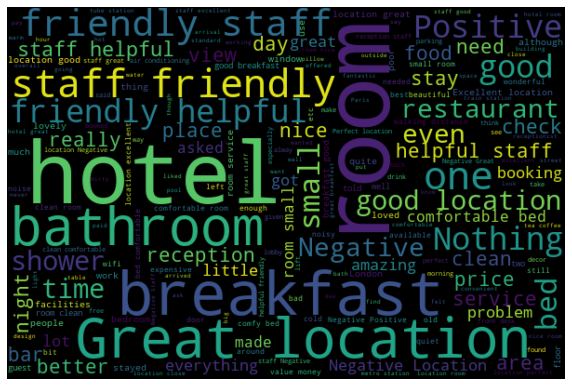

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

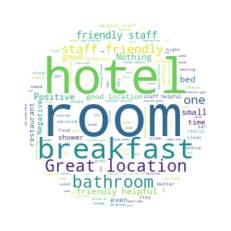

In [28]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neil.ralston.MAC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [31]:
fd.most_common(20)

[('room', 13771),
 ('The', 13580),
 ('staff', 9338),
 ('hotel', 9010),
 ('location', 7236),
 ('Negative', 6263),
 ('breakfast', 5186),
 ('good', 5126),
 ('friendly', 3940),
 ('helpful', 3895),
 ('great', 3637),
 ('bed', 3429),
 ('clean', 3221),
 ('nice', 3188),
 ('rooms', 2933),
 ('comfortable', 2882),
 ('Location', 2800),
 ('small', 2712),
 ('Very', 2576),
 ('stay', 2397)]

In [32]:
fd.tabulate(3)

 room   The staff 
13771 13580  9338 


In [33]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

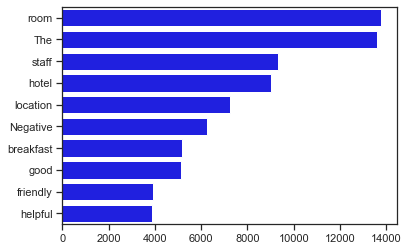

In [34]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [103]:
# Show frequency of a specific word
fd["small"]

2712

In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\neil.ralston.MAC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [38]:
hotel_sample_df['polarity'] = hotel_sample_df['All_Reviews_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
hotel_sample_df.tail(3)

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,lat,lng,Hotel_Country,Sentiment,All_Reviews,All_Reviews_token,All_Reviews_string,All_Reviews_string_fdist,All_Reviews_string_lem,polarity
18511,18511,10 Carlisle Street Westminster Borough London ...,329,2016-12-20,9.0,The Nadler Soho,Monaco,The room was extremely small No turn down The...,56,1394,...,51.514739,-0.134111,uk,Negative,The location- The room was extremely small No...,"[The, location, The, room, extremely, small, N...",The location The room extremely small turn The...,The location The room extremely small turn The...,The location The room extremely small turn The...,"{'neg': 0.085, 'neu': 0.652, 'pos': 0.263, 'co..."
484034,486690,Via Rubens 21 San Siro 20148 Milan Italy,54,2015-09-22,8.5,Antares Hotel Rubens,Turkey,i would not recomment for long stay,8,1231,...,45.467058,9.142782,italy,Positive,just to stay for 1 night it is good price- i ...,"[stay, 1, night, good, price, would, recomment...",stay night good price would recomment long stay,stay night good price would long stay,stay night good price would long stay,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp..."
367182,368824,Leeuwendalersweg 21 Bos en Lommer 1055 JE Amst...,587,2016-09-25,7.4,Best Western Blue Tower Hotel,Ireland,Air con didn t work but we got a fan from rec...,13,3869,...,52.379366,4.845718,netherlands,Positive,Extra clean bedding daily - Air con didn t wo...,"[Extra, clean, bedding, daily, Air, con, work,...",Extra clean bedding daily Air con work got fan...,Extra clean bedding daily Air con work got fan...,Extra clean bedding daily Air con work got fan...,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp..."


In [39]:
# Change data structure
hotel_sample_df = pd.concat(
    [hotel_sample_df.drop(['Unnamed: 0', 'Additional_Number_of_Scoring', 'Review_Date', 'Reviewer_Nationality', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags', 'days_since_review'], axis=1), 
     hotel_sample_df['polarity'].apply(pd.Series)], axis=1)
hotel_sample_df.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Total_Number_of_Reviews,Positive_Review,Reviewer_Score,lat,lng,Hotel_Country,...,All_Reviews,All_Reviews_token,All_Reviews_string,All_Reviews_string_fdist,All_Reviews_string_lem,polarity,neg,neu,pos,compound
302260,Corso Buenos Aires 3 Milan City Center 20124 M...,8.6,Worldhotel Cristoforo Colombo,level of noise from the metro and other guest...,2875,Location,7.1,45.475884,9.205791,italy,...,Location- level of noise from the metro and o...,"[Location, level, noise, metro, guests, We, go...",Location level noise metro guests got little s...,Location level noise metro guests got little s...,Location level noise metro guests got little s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
478784,Via Manin 7 Milan City Center 20121 Milan Italy,8.4,Hotel Manin,Complimentary water would have been nice Neig...,1757,Great location convenient for almost everythi...,8.3,45.473980,9.196067,italy,...,Great location convenient for almost everythi...,"[Great, location, convenient, almost, everythi...",Great location convenient almost everything Go...,Great location convenient almost everything Go...,Great location convenient almost everything Go...,"{'neg': 0.036, 'neu': 0.587, 'pos': 0.377, 'co...",0.036,0.587,0.377,0.9458
320721,Euston Road Camden London NW1 2AR UK,8.8,St Pancras Renaissance Hotel London,No Negative,2058,Ideal location for guests travelling by rail ...,9.6,51.526777,-0.132491,uk,...,Ideal location for guests travelling by rail ...,"[Ideal, location, guests, travelling, rail, Ve...",Ideal location guests travelling rail Very com...,Ideal location guests travelling rail Very com...,Ideal location guests travelling rail Very com...,"{'neg': 0.198, 'neu': 0.428, 'pos': 0.374, 'co...",0.198,0.428,0.374,0.5095
186869,419 437 Hackney Road London E2 8PP UK,7.8,The RE London Shoreditch,It was tricky getting the television to work,2147,Hotel was very accomodating regarding bike st...,9.2,51.531979,-0.061598,uk,...,Hotel was very accomodating regarding bike st...,"[Hotel, accomodating, regarding, bike, storage...",Hotel accomodating regarding bike storage tric...,Hotel accomodating regarding bike storage tric...,Hotel accomodating regarding bike storage tric...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.1531
158580,35 Charles Street Mayfair Westminster Borough ...,9.1,The Chesterfield Mayfair,Nothing,1166,Had a great time the bar staff Piano player n...,10.0,51.507690,-0.147136,uk,...,Had a great time the bar staff Piano player n...,"[Had, great, time, bar, staff, Piano, player, ...",Had great time bar staff Piano player nailed N...,Had great time bar staff player Nothing,Had great time bar staff player Nothing,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.000,0.594,0.406,0.6249


In [40]:
# Create new variable with sentiment "neutral," "positive" and "negative"
hotel_sample_df['sentiment2'] = hotel_sample_df['compound'].apply(lambda x: 'positive' if x >=.7 else 'neutral' if .4 < x <.7 else 'negative')
hotel_sample_df.head(10)

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Total_Number_of_Reviews,Positive_Review,Reviewer_Score,lat,lng,Hotel_Country,...,All_Reviews_token,All_Reviews_string,All_Reviews_string_fdist,All_Reviews_string_lem,polarity,neg,neu,pos,compound,sentiment2
302260,Corso Buenos Aires 3 Milan City Center 20124 M...,8.6,Worldhotel Cristoforo Colombo,level of noise from the metro and other guest...,2875,Location,7.1,45.475884,9.205791,italy,...,"[Location, level, noise, metro, guests, We, go...",Location level noise metro guests got little s...,Location level noise metro guests got little s...,Location level noise metro guests got little s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,negative
478784,Via Manin 7 Milan City Center 20121 Milan Italy,8.4,Hotel Manin,Complimentary water would have been nice Neig...,1757,Great location convenient for almost everythi...,8.3,45.473980,9.196067,italy,...,"[Great, location, convenient, almost, everythi...",Great location convenient almost everything Go...,Great location convenient almost everything Go...,Great location convenient almost everything Go...,"{'neg': 0.036, 'neu': 0.587, 'pos': 0.377, 'co...",0.036,0.587,0.377,0.9458,positive
320721,Euston Road Camden London NW1 2AR UK,8.8,St Pancras Renaissance Hotel London,No Negative,2058,Ideal location for guests travelling by rail ...,9.6,51.526777,-0.132491,uk,...,"[Ideal, location, guests, travelling, rail, Ve...",Ideal location guests travelling rail Very com...,Ideal location guests travelling rail Very com...,Ideal location guests travelling rail Very com...,"{'neg': 0.198, 'neu': 0.428, 'pos': 0.374, 'co...",0.198,0.428,0.374,0.5095,neutral
186869,419 437 Hackney Road London E2 8PP UK,7.8,The RE London Shoreditch,It was tricky getting the television to work,2147,Hotel was very accomodating regarding bike st...,9.2,51.531979,-0.061598,uk,...,"[Hotel, accomodating, regarding, bike, storage...",Hotel accomodating regarding bike storage tric...,Hotel accomodating regarding bike storage tric...,Hotel accomodating regarding bike storage tric...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.1531,negative
158580,35 Charles Street Mayfair Westminster Borough ...,9.1,The Chesterfield Mayfair,Nothing,1166,Had a great time the bar staff Piano player n...,10.0,51.507690,-0.147136,uk,...,"[Had, great, time, bar, staff, Piano, player, ...",Had great time bar staff Piano player nailed N...,Had great time bar staff player Nothing,Had great time bar staff player Nothing,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.000,0.594,0.406,0.6249,neutral
417902,Prins Hendrikkade 33 Amsterdam City Center 101...,9.0,art otel Amsterdam,Nothing,3158,An amazing modern minimalist Art Deco hotel I...,10.0,52.377743,4.897057,netherlands,...,"[An, amazing, modern, minimalist, Art, Deco, h...",amazing modern minimalist Art Deco hotel love ...,amazing modern minimalist Art Deco hotel love ...,amazing modern minimalist Art Deco hotel love ...,"{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp...",0.000,0.429,0.571,0.8402,positive
342902,Hintschiggasse 1 10 Favoriten 1100 Vienna Austria,8.1,Arion Cityhotel Vienna und Appartements,The carpet was a bit dirty and they didn t pr...,3887,No Positive,7.1,48.158533,16.345112,austria,...,"[No, Positive, The, carpet, bit, dirty, provid...",Positive The carpet bit dirty provide clean cu...,Positive The carpet bit dirty provide clean cu...,Positive The carpet bit dirty provide clean cu...,"{'neg': 0.179, 'neu': 0.432, 'pos': 0.389, 'co...",0.179,0.432,0.389,0.5267,neutral
18123,10 Berners Street Westminster Borough London W...,9.1,The London EDITION,the room was cold in feeling with very little...,372,No Positive,5.4,51.516747,-0.135965,uk,...,"[No, Positive, room, cold, feeling, little, fu...",Positive room cold feeling little furniture pl...,Positive room cold feeling little furniture pl...,Positive room cold feeling little furniture pl...,"{'neg': 0.098, 'neu':

In [41]:
hotel_sample_df.loc[hotel_sample_df['compound'].idxmax()].values

array(['Capellans 4 Ciutat Vella 08002 Barcelona Spain', 8.9,
       'Hotel Barcelona Catedral',
       ' The restaurant here is closed on weekends but there are dozens of restaurants within a 10 minute walk so it wasn t an issue for us ',
       2695,
       ' This place was a surprise we expected it to be good and it was actually great There is no view here as there is at the Colon Hotel literally around the corner and which costs over 50 EU per night more and at which we also stayed at the end of our trip BUT the reception was warm and welcoming and friendly They even provided us with a certificate for a free celebratory cocktail as our trip was celebrating an occasion The bed was very comfortable firm and the room had all the amenities one needs including working air conditioning The best part of this hotel is the free one hour walking tour of the Gothic Quarter provided by Olga an academic at the University Sundays and Wednesdays are her tours She knew so much about this history o

In [42]:
hotel_sample_df.loc[hotel_sample_df['compound'].idxmin()].values

array(['163 Marsh Wall Docklands Tower Hamlets London E14 9SJ UK', 7.1,
       'Britannia International Hotel Canary Wharf',
       ' long story short Girlfriend booked a room there was no ac window broken and cant be opened needed another room hotel said only twin rooms available but I checked online and there was a double So I had to book the double and pay for it So we are paying for 2 rooms because of the hotel This all seemed unethical and the heat in the room was frankly dangerous I moved on from this but was still annoyed but what felt like the unfair loss of 65 The next day we moved to another room that the hotel said was cooler and it was for a moment but again there was no AC and no window so the heat eventually stated to build up The cleaner barely cleaned the room when asked to and attempted to just flip over the dirty pillow cases instead of changing them Asked for a fan 3 times before receiving one Attempted to complain politely a number of times 1st manager said he could

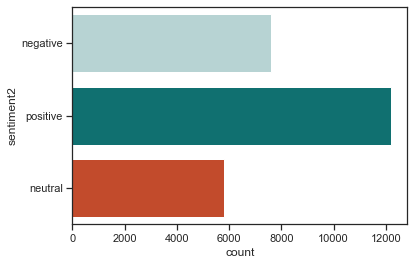

In [43]:
sns.countplot(y='sentiment2', 
             data=hotel_sample_df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

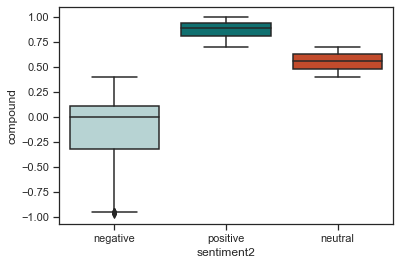

In [44]:
sns.boxplot(y='compound', 
            x='sentiment2',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=hotel_sample_df);

In [45]:
#count vectorizer

In [46]:
pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.


In [47]:
#countvectorizer model
import nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [48]:
#CountVectorizer model
count = CountVectorizer()
count_matrix = count.fit_transform(hotel_sample_df['All_Reviews_string_lem'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

indices = pd.Series(hotel_sample_df['Hotel_Name'])

[[1.         0.05661385 0.21320072 ... 0.04682929 0.         0.1118034 ]
 [0.05661385 1.         0.09656091 ... 0.12725695 0.1067521  0.        ]
 [0.21320072 0.09656091 1.         ... 0.07987231 0.         0.        ]
 ...
 [0.04682929 0.12725695 0.07987231 ... 1.         0.04415108 0.08377078]
 [0.         0.1067521  0.         ... 0.04415108 1.         0.        ]
 [0.1118034  0.         0.         ... 0.08377078 0.         1.        ]]


In [49]:
test = count_matrix.toarray()
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
len(test[0])

5425

In [51]:
sum(test[0])

8

In [80]:
def recommend_cv(Hotel_Name, cosine_sim = cosine_sim):
    recommended_hotel = []
    idx = indices[indices == Hotel_Name].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_hotel.append(list(hotel_sample_df['Hotel_Name'])[i])
        
    return recommended_hotel

In [81]:
recommend_cv('Hotel Arena')

['Lancaster London',
 'Hotel Manzoni',
 'The Chamberlain',
 'Radisson Blu Portman Hotel London',
 'Megaro Hotel',
 'The Hoxton Amsterdam',
 'DoubleTree by Hilton Hotel London Tower of London',
 'Hotel degli Arcimboldi',
 'Best Western Premier Louvre Saint Honor ',
 'Austria Trend Hotel Astoria Wien']

In [54]:
# above recommends hotel based on another hotel name, want to recommend hotel based on review criteria

In [55]:
#TF-IDF

In [56]:
#imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [57]:
tfidf = TfidfVectorizer(stop_words='english',smooth_idf=True)

# numbers to calculate similarities
tfidf_matrix = tfidf.fit_transform(hotel_sample_df['All_Reviews_string_lem']).todense()

#calculate cosine matrix
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_similarities)

indices = pd.Series(hotel_sample_df['Hotel_Name'])

C:\Users\neil.ralston.MAC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[[1.         0.00994746 0.14677909 ... 0.01177848 0.         0.10487451]
 [0.00994746 1.         0.02654977 ... 0.05423908 0.02094061 0.        ]
 [0.14677909 0.02654977 1.         ... 0.00905406 0.         0.        ]
 ...
 [0.01177848 0.05423908 0.00905406 ... 1.         0.02479513 0.17389301]
 [0.         0.02094061 0.         ... 0.02479513 1.         0.        ]
 [0.10487451 0.         0.         ... 0.17389301 0.         1.        ]]


In [58]:
#get recommendations based on tf-idf and cosine_similarities

def recommend_tf(Hotel_Name, cosine_similarities = cosine_similarities):
    
    recommended_hotel = []
    recommended_hotel_address = []
    recommended_hotel_rating = []
    recommended_hotel_lat = []
    recommended_hotel_lng = []
     
    idx = indices[indices == Hotel_Name].index[0]
    
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)
    
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_hotel.append(list(hotel_sample_df['Hotel_Name'])[i])
        recommended_hotel_address.append(list(hotel_sample_df['Hotel_Address'])[i])
        recommended_hotel_rating.append(list(hotel_sample_df['Average_Score'])[i])
        recommended_hotel_lat.append(list(hotel_sample_df['lat'])[i])
        recommended_hotel_lng.append(list(hotel_sample_df['lng'])[i])

    data = {'Hotel': recommended_hotel,
           'Address': recommended_hotel_address,
            'Rating': recommended_hotel_rating,
            'Lat' : recommended_hotel_lat,
            'Lng':recommended_hotel_lng,
           }
    rec_df = pd.DataFrame(data)
    
    return rec_df

In [59]:
recommend_tf('Hotel Arena')

,Hotel,Address,Rating,Lat,Lng
0,Le Burgundy Paris,6 8 Rue Duphot 1st arr 75001 Paris France,9.1,48.868006,2.326007
1,Lancaster London,Lancaster Terrace Westminster Borough London W...,8.3,51.511945,-0.179939
2,Hotel Ares Eiffel,7 rue du G n ral de Larminat 15th arr 75015 Pa...,8.8,48.850328,2.298202
3,Hotel Midmost,Pelayo 14 Ciutat Vella 08001 Barcelona Spain,9.2,41.385617,2.165949
4,Pullman London St Pancras,100 110 Euston Road Camden London NW1 2AJ UK,8.9,51.528677,-0.128349
5,Strand Palace Hotel,372 Strand Westminster Borough London WC2R 0JJ UK,8.1,51.511099,-0.120867
6,Hotel Barcelona Universal,Avinguda Paral lel 76 78 Ciutat Vella 08001 Ba...,8.8,41.375237,2.168406
7,ME London by Melia,336 337 Strand London Westminster Borough Lond...,9.2,51.511879,-0.118552
8,DoubleTree by Hilton London Ealing,2 8 Hanger Lane Ealing Common London W5 3HN UK,8.4,51.511521,-0.290706
9,Warwick Paris Former Warwick Champs Elysees,5 rue de Berri 8th arr 75008 Paris France,8.1,48.872202,2.303087


In [60]:
hotel_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25624 entries, 302260 to 367182
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hotel_Address             25624 non-null  object 
 1   Average_Score             25624 non-null  float64
 2   Hotel_Name                25624 non-null  object 
 3   Negative_Review           25624 non-null  object 
 4   Total_Number_of_Reviews   25624 non-null  int64  
 5   Positive_Review           25624 non-null  object 
 6   Reviewer_Score            25624 non-null  float64
 7   lat                       25624 non-null  float64
 8   lng                       25624 non-null  float64
 9   Hotel_Country             25624 non-null  object 
 10  Sentiment                 25624 non-null  object 
 11  All_Reviews               25624 non-null  object 
 12  All_Reviews_token         25624 non-null  object 
 13  All_Reviews_string        25624 non-null  object 
 14  

In [61]:
hotel_sample_df.Hotel_Name.value_counts()

Britannia International Hotel Canary Wharf           230
Park Plaza Westminster Bridge London                 224
Strand Palace Hotel                                  205
Copthorne Tara Hotel London Kensington               177
DoubleTree by Hilton Hotel London Tower of London    165
                                                    ... 
Victoires Opera                                        1
City Rooms                                             1
R Kipling by Happyculture                              1
Hotel G tico                                           1
Mercure Paris Bastille Marais                          1
Name: Hotel_Name, Length: 1436, dtype: int64

In [62]:
# above recommends hotel based on another hotel name, want to recommend hotel based on review criteria

In [63]:
# KNN

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [70]:
hotel_sample2_df = hotel_sample_df.drop(["Hotel_Address", "Hotel_Name", "Negative_Review", "Positive_Review", "lat", "lng", "Hotel_Country", "Sentiment", "All_Reviews", "All_Reviews_token", "All_Reviews_string", "All_Reviews_string_fdist", "All_Reviews_string_lem", "polarity", "sentiment2", "Average_Score", "Total_Number_of_Reviews", "Reviewer_Score"], axis=1)

In [71]:
hotel_sample2_df.head()

,neg,neu,pos,compound
302260,0.000,1.000,0.000,0.0000
478784,0.036,0.587,0.377,0.9458
320721,0.198,0.428,0.374,0.5095
186869,0.167,0.833,0.000,-0.1531
158580,0.000,0.594,0.406,0.6249


In [82]:
# knn
def recommender_knn(hotel_sample_df, book_title, n_neighbors=11):
    
    hotel_sample2_df = hotel_sample_df.drop(["Hotel_Address", "Hotel_Name", "Negative_Review", "Positive_Review", "lat", "lng", "Hotel_Country", "Sentiment", "All_Reviews", "All_Reviews_token", "All_Reviews_string", "All_Reviews_string_fdist", "All_Reviews_string_lem", "polarity", "sentiment2", "Average_Score", "Total_Number_of_Reviews", "Reviewer_Score"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(hotel_sample2_df)
    
    hotel = hotel_sample_df.loc[hotel_sample_df["Hotel_Name"] == book_title]
    hotel = hotel.drop(["Hotel_Address", "Hotel_Name", "Negative_Review", "Positive_Review", "lat", "lng", "Hotel_Country", "Sentiment", "All_Reviews", "All_Reviews_token", "All_Reviews_string", "All_Reviews_string_fdist", "All_Reviews_string_lem", "polarity", "sentiment2", "Average_Score", "Total_Number_of_Reviews", "Reviewer_Score"], axis=1)
    hotel = hotel.to_numpy()
    
    distances, indices = model_knn.kneighbors(hotel, n_neighbors = n_neighbors)
    
    result = hotel_sample_df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
    
    return result

In [101]:
df_result = recommender_knn(hotel_sample_df, "Hotel Arena")

C:\Users\neil.ralston.MAC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\neil.ralston.MAC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [102]:
df_result.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Total_Number_of_Reviews,Positive_Review,Reviewer_Score,lat,lng,Hotel_Country,...,All_Reviews_string,All_Reviews_string_fdist,All_Reviews_string_lem,polarity,neg,neu,pos,compound,sentiment2,Distance
314,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,It s just a little bit out of the centre Abou...,1403,We loved this hotel And our beautiful hotel r...,9.2,52.360576,4.915968,netherlands,...,loved hotel And beautiful hotel room little bi...,loved hotel And beautiful hotel room little bi...,loved hotel And beautiful hotel room little bi...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.0,0.585,0.415,0.8316,positive,0.000000
202376,5 rue du 8 Mai 1945 10th arr 75010 Paris France,7.9,Holiday Inn Paris Gare de l Est,The staff were not helpful They advertised a ...,6511,The wifi was very good,5.0,48.875898,2.359050,france,...,The wifi good The staff helpful They advertise...,The wifi good The staff helpful They advertise...,The wifi good The staff helpful They advertise...,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",0.0,0.586,0.414,0.8360,positive,0.000004
427284,Rennweg 99 Rinnboeckstrasse 1 03 Landstra e 10...,8.7,Austria Trend Hotel Doppio Wien,It is told breakfast is bio But no fresh eggs...,3010,Friendly and helpful staff except breakfast,6.7,48.185431,16.404884,austria,...,Friendly helpful staff except breakfast told b...,Friendly helpful staff except breakfast told b...,Friendly helpful staff except breakfast told b...,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",0.0,0.586,0.414,0.8360,positive,0.000004
295021,Cardenal Reig 11 Les Corts 08028 Barcelona Spain,7.7,Senator Barcelona Spa Hotel,Just a little out off the way to the rambla t...,3097,Lovely hotel and close to nou camp stadium wh...,10.0,41.377798,2.113597,spain,...,Lovely hotel close nou camp stadium great watc...,Lovely hotel close nou camp stadium great watc...,Lovely hotel close nou camp stadium great watc...,"{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'comp...",0.0,0.582,0.418,0.8360,positive,0.000012
471811,Via Fabio Filzi 3 Central Station 20124 Milan ...,8.3,Hotel Marconi,The breakfast wasn t that great,1806,The location is absolutely convenient and the...,9.2,45.486874,9.201841,italy,...,The location absolutely convenient facilities ...,The location absolutely convenient facilities ...,The location absolutely convenient facilities ...,"{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'comp...",0.0,0.582,0.418,0.8360,positive,0.000012
